In [30]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [31]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [32]:
#norm the values in [0,1]
x_train=x_train/255.0
x_test=x_test/255.0

In [33]:
x_train_flat=x_train.reshape(x_train.shape[0],-1)
x_test_flat=x_test.reshape(x_test.shape[0],-1)

In [34]:
#encoding the labels to one hot key
num_classes=10
y_train_hot=np.eye(num_classes)[y_train]
y_test_hot=np.eye(num_classes)[y_test]

In [35]:
#initialing and giving details about the architecture of the neural network
i_s=x_train_flat.shape[1]
h1_s=512
h2_s=256
o_s=num_classes
#initialise the parameters
w1=np.random.randn(i_s,h1_s)*0.01
b1=np.zeros((1,h1_s))
w2=np.random.randn(h1_s,h2_s)*0.01
b2=np.zeros((1,h2_s))
w3=np.random.randn(h2_s,o_s)*0.01
b3=np.zeros((1,o_s))

In [36]:
#defining our activation functions 
def ReLU(x):
    return np.maximum(0,x)

def softmax(x):
    exp_sc=np.exp(x-np.max(x,axis=1,keepdims=True))
    return exp_sc/np.sum(exp_sc,axis=1,keepdims=True)

In [37]:
#defining the forward prop
def forward_prop(x):
    global z1,z2,z3,a1,a2,a3
    z1=np.dot(x,w1)+b1
    a1=ReLU(z1)
    z2=np.dot(a1,w2)+b2
    a2=ReLU(z2)
    #givign the inpute a2 to the final layer which results in the output
    z3=np.dot(a2,w3)+b3
    a3=softmax(z3)
    return a3



In [38]:
#defining the loss function
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
    loss = np.sum(log_probs) / m
    return loss


In [39]:
learning_rate=0.001
def back_prop(x,y_true,y_pred):
    global w1,w2,w3,b1,b2,b3
    m=y_true.shape[0]
    #backprop from the last layer
    dz3 = y_pred-y_true
    dw3 = np.dot(a2.T,dz3)/m
    db3=np.sum(dz3,axis=0,keepdims=True)/m
    #onto the layer before 
    da2 = np.dot(dz3,w3.T)
    dz2=da2*(z2>0)
    dw2=np.dot(a1.T,dz2)/m
    db2=np.sum(dz2,axis=0,keepdims=True)/m
    #onto the layer before this
    da1 = np.dot(dz2,w2.T)
    dz1=da1*(z1>0)
    dw1=np.dot(x.T,dz1)/m
    db1=np.sum(dz1,axis=0,keepdims=True)/m
    #updating the params for this back_prop
    w3 -= learning_rate * dw3
    b3 -= learning_rate * db3
    w2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    w1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    
    

In [43]:
#trainig the data 
epochs=20
batch_s=32
for epoch in range(epochs):
    for i in range(0,x_train_flat.shape[0],batch_s):
        x_batch=x_train_flat[i:i+batch_s]
        y_batch=y_train_hot[i:i+batch_s]
        y_pred=forward_prop(x_batch)
        #compute the loss
        loss=compute_loss(y_batch,y_pred)
        #backprop
        back_prop(x_batch,y_batch,y_pred)

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')



Epoch 1/20, Loss: 1.1094
Epoch 2/20, Loss: 0.8352
Epoch 3/20, Loss: 0.6835
Epoch 4/20, Loss: 0.5896
Epoch 5/20, Loss: 0.5227
Epoch 6/20, Loss: 0.4703
Epoch 7/20, Loss: 0.4281
Epoch 8/20, Loss: 0.3940
Epoch 9/20, Loss: 0.3666
Epoch 10/20, Loss: 0.3441
Epoch 11/20, Loss: 0.3250
Epoch 12/20, Loss: 0.3081
Epoch 13/20, Loss: 0.2929
Epoch 14/20, Loss: 0.2791
Epoch 15/20, Loss: 0.2664
Epoch 16/20, Loss: 0.2545
Epoch 17/20, Loss: 0.2436
Epoch 18/20, Loss: 0.2336
Epoch 19/20, Loss: 0.2244
Epoch 20/20, Loss: 0.2160


In [44]:
def compute_accuracy(y_true, y_pred):
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(y_true, axis=1)
    accuracy = np.mean(y_pred_labels == y_true_labels)
    return accuracy

test_pred_final = forward_prop(x_test_flat)
test_accuracy = compute_accuracy(y_test_hot, test_pred_final)
print(f'Final Test Accuracy: {test_accuracy:.4f}')



Final Test Accuracy: 0.8949


In [45]:
# i think 89% accuracy is good enough but with standard practise and creating the same nn using torch results in a accurac
#of 98% which is huge , now in case of svm we got a accuracy of 95% ig also using the standard practise of normalisation and stuff

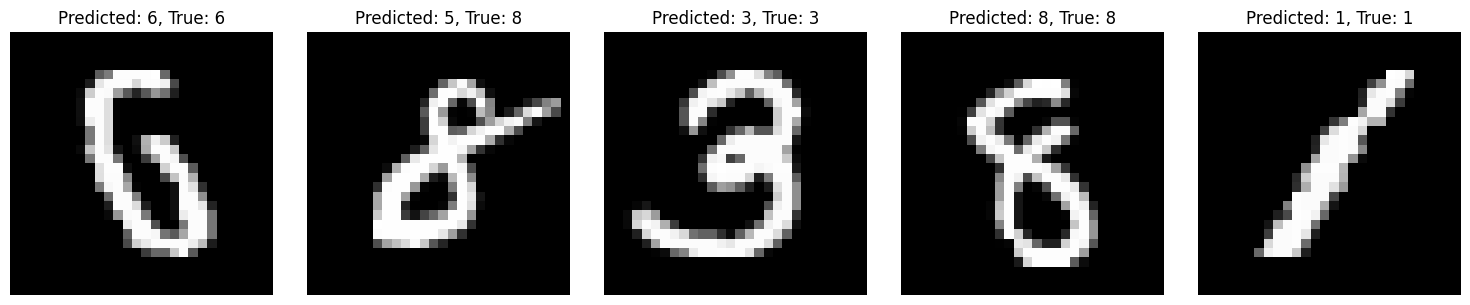

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Function to make predictions using your custom neural network
def predict(x):
    # Implement forward propagation to get predictions
    # Assuming `forward_propagation` is defined in your implementation
    return forward_prop(x)

# Function to show images with predictions
def show_images_with_predictions(images, true_labels):
    num_images = len(images)
    predictions = []
    
    # Predict labels for the chosen images
    for image in images:
        prediction = predict(image[np.newaxis, :])  # Assuming predict takes a single image
        predictions.append(np.argmax(prediction))  # Assuming softmax output, get index of max value
    
    # Plot images with their predicted and true labels
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Predicted: {predictions[i]}, True: {true_labels[i]}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Assuming x_test_flat and y_test are defined
# Select random images from the test set
num_images_to_show = 5
indices = np.random.choice(len(x_test_flat), num_images_to_show, replace=False)
images = x_test_flat[indices]
true_labels = y_test[indices]

# Call the function to display images with predictions
show_images_with_predictions(images, true_labels)



#imma be honest i used google to get this function idk how to make this in matplotlib :sob:
